In [ ]:
# Link to this notebook on Google Colab:
# https://colab.research.google.com/drive/1jjkJcox4lbWP6ayWDfAVN_oMvnWbbNwo?usp=sharing

In [69]:
# Install the latest SuSMoST Main package for the proper Python version 
# from here: https://susmost.com/downloads.html
!pip install -q https://susmost.com/_downloads/3482a812428058fd01371856aa5faee9/SuSMoST-1.1.post182+g0dba131-cp39-cp39-linux_x86_64.whl
import susmost

In [ ]:
# Download some examples of adsorption complexes
# from here: https://gitlab.com/susmost/adsorption-complexes

!wget https://gitlab.com/susmost/adsorption-complexes/-/raw/main/Fe-Cu100.xyz
!wget https://gitlab.com/susmost/adsorption-complexes/-/raw/main/TPA-Cu100.xyz
!wget https://gitlab.com/susmost/adsorption-complexes/-/raw/main/empty-Cu100.xyz


In [34]:
!head -n 5 empty-Cu100.xyz

4
Lattice="2.555483907208183 0.0 0.0 0.0 2.555483907208183 0.0 0.0 0.0 20.0" Properties=species:S:1:pos:R:3 ac_origin="-0.1 -0.1 0" pbc="T T F" size="1 1" sym_prec=0.1
Cu       0.00000000       0.000            7.22900000
Cu       1.27774195       1.27812398       1.80700000
Cu       0.00000000       0.000            3.61500000


In [68]:
!head Fe_pairs/sample_004.xyz

117
Lattice="12.777419536040915 0.0 0.0 0.0 12.777419536040915 0.0 0.0 0.0 20.0" Properties=species:S:1:pos:R:3:remoteness:R:1:shift:R:3:adsorption:S:1 ac_origin="-0.1 -0.1 0.0" size="_JSON [[5, 0], [0, 5]]" sym_prec=0.1 mass_center_dist=2.510617670726449 min_atom_dist=1.278339652001235 s1=Fe s2=TPA s1idx=1 s2idx=3 pbc="T T T"
Cu       0.10000000       0.10000000       7.22900000              inf       0.00000000       0.00000000       0.00000000 s 
Cu       1.37774195       1.37812398       1.80700000              inf       0.00000000       0.00000000       0.00000000 s 
Cu       0.10000000       0.10000000       3.61500000              inf       0.00000000       0.00000000       0.00000000 s 
Cu       1.37774195       1.37812398       5.42200000              inf       0.00000000       0.00000000       0.00000000 s 
Cu       0.10000000       2.65548391       7.22900000              inf       0.00000000       0.00000000       0.00000000 s 
Cu       1.37774195       3.93360789       1.8

In [35]:
from ase.io import read, write

In [36]:
write("empty-Cu100.png", read("empty-Cu100.xyz"))

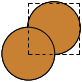

In [37]:
from IPython.display import Image, display
Image(filename='empty-Cu100.png') 

17
Lattice="5.110967814416366 0.0 0.0 0.0 5.110967814416366 0.0 0.0 0.0 20.0" Properties=species:S:1:pos:R:3:adsorption:S:1 ac_name=Fe size="2 2" pbc="T T F" sym_prec=0.1
Cu       0.10000000       0.10038203       7.22900000 s 
Cu       1.37774195       1.37812398       1.80700000 s 
Cu       0.10000000       0.10038203       3.61500000 s 
Cu       1.37774195       1.37812398       5.42200000 s 
Fe       1.37774195       1.37812398       9.00000000 a1 
Cu       0.10000000       2.65586594       7.22900000 s 
Cu       1.37774195       3.93360789       1.80700000 s 
Cu       0.10000000       2.65586594       3.61500000 s 


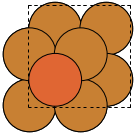

In [38]:
!head -n 10 Fe-Cu100.xyz
write("Fe-Cu100.png", read("Fe-Cu100.xyz"))
Image(filename='Fe-Cu100.png') 

20
Lattice="2.555483907208183 0.0 0.0 0.0 2.555483907208183 0.0 0.0 0.0 20.0" Properties=species:S:1:pos:R:3:Z:I:1 ac_name=TPA ac_origin="-0.1 -0.1, 0" pbc="T T F" size="1 1"  surface_zlevel="8.0" sym_prec=0.3
Cu       0.00000000       0.00038203       7.22900000       29 
Cu       1.27774195       1.27812398       1.80700000       29 
Cu       0.00000000       0.00038203       3.61500000       29 
Cu       1.27774195       1.27812398       5.42200000       29 
C      -0.01979899       1.21377726       9.22400000        6 
C       0.69437886       2.44131464       9.30400000        6 
C       2.09798582       2.44909281       9.33300000        6 
C       2.82842712       1.22933361       9.29400000        6 


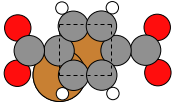

In [39]:
!head -n 10 TPA-Cu100.xyz
write("TPA-Cu100.png", read("TPA-Cu100.xyz"))
Image(filename='TPA-Cu100.png')

In [40]:
a = read('TPA-Cu100.xyz')
a.info['sym_prec'] = 0.1
write('prec-TPA-Cu100.xyz', [a], 'extxyz')
!head prec-TPA-Cu100.xyz

20
Lattice="2.555483907208183 0.0 0.0 0.0 2.555483907208183 0.0 0.0 0.0 20.0" Properties=species:S:1:pos:R:3 ac_name=TPA ac_origin="-0.1 -0.1 0.0" size="1 1" surface_zlevel=8.0 sym_prec=0.1 pbc="T T F"
Cu       0.00000000       0.00038203       7.22900000
Cu       1.27774195       1.27812398       1.80700000
Cu       0.00000000       0.00038203       3.61500000
Cu       1.27774195       1.27812398       5.42200000
C       -0.01979899       1.21377726       9.22400000
C        0.69437886       2.44131464       9.30400000
C        2.09798582       2.44909281       9.33300000
C        2.82842712       1.22933361       9.29400000


# Pairwise samples

In [ ]:
from susmost import make_ac_samples

borders = ('fixed', 5, 0, 0, 5)
#borders = ('border', 2, 2)

#make_ac_samples('Fe_pairs', ['empty-Cu100.xyz', 'Fe-Cu100.xyz'], r_cut_off = 6, borders=borders )
make_ac_samples('Fe_pairs', ['empty-Cu100.xyz', 'Fe-Cu100.xyz', 'TPA-Cu100.xyz'], r_cut_off = 6, borders=borders )
#make_ac_samples('Fe_pairs', ['empty-Cu100.xyz', 'prec-TPA-Cu100.xyz'], r_cut_off = 3, borders=borders )

In [ ]:
from glob import glob

for fn in sorted(glob("Fe_pairs/sample_*.xyz")):
#for fn in sorted(glob("Fe_pairs/adsorbate_state_*.xyz")):
  a = read(fn)
  if len(a) == 0:
    continue
  write("tmp.png", a)
  print (fn)
  display(Image(filename='tmp.png'))

# Adlayer samples

In [13]:
from susmost.acutils import load_ac_list
from susmost.enumphases import enum_phases, enum_surface_supercells



In [51]:
# Download tgz archive with SuSMoST command line utils
# from here: https://susmost.com/downloads.html

!wget https://susmost.com/_downloads/a1535d30d01ce25a1bc54d685600fdbc/utils.tgz
!tar -xf utils.tgz

--2023-03-22 11:02:05--  https://susmost.com/_downloads/a1535d30d01ce25a1bc54d685600fdbc/utils.tgz
Resolving susmost.com (susmost.com)... 31.31.196.221
Connecting to susmost.com (susmost.com)|31.31.196.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9485 (9.3K) [application/x-gzip]
Saving to: ‘utils.tgz.1’

utils.tgz.1         100%[===================>]   9.26K  --.-KB/s    in 0s      

2023-03-22 11:02:06 (197 MB/s) - ‘utils.tgz.1’ saved [9485/9485]



In [ ]:
!python3  -u utils/adlenum.py enum  4 empty-Cu100.xyz TPA-Cu100.xyz


In [57]:
!rm phase_*

In [ ]:
for fn in sorted(glob("phase_*.xyz")):
  a = read(fn)*(1,1,1)
  if len(a) == 0:
    continue
  write("tmp.png", a)
  print (fn)
  display(Image(filename='tmp.png'))

# Enumerate paths

In [ ]:
# Upload starting and final configurations of an adsorption complex:
!head ads1.xyz
!head ads2.xyz

In [ ]:
!python3  -u utils/enumpaths.py ads1.xyz ads2.xyz NEB


In [63]:
!ls NEB

ac1.xyz  ac2.xyz  empty-slab.xyz  samples  sorted_paths.xyz





START:


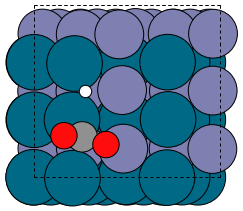

FINAL:


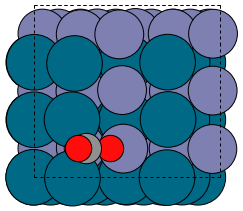




START:


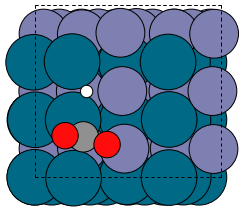

FINAL:


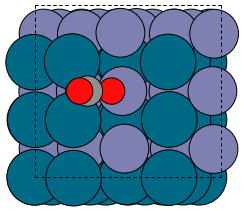




START:


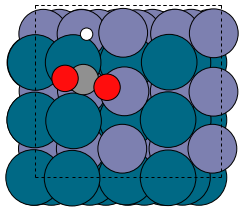

FINAL:


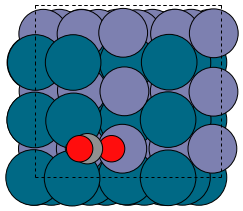




START:


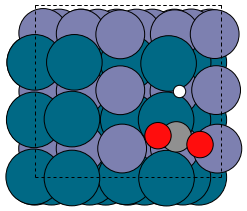

FINAL:


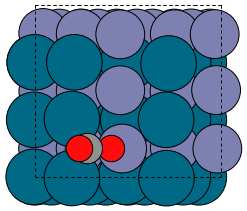




START:


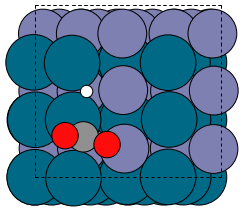

FINAL:


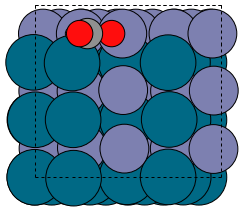




START:


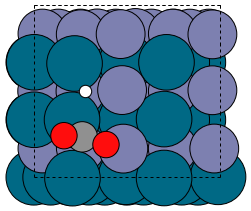

FINAL:


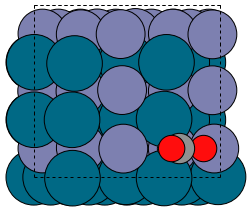




START:


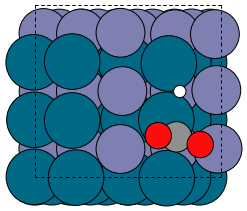

FINAL:


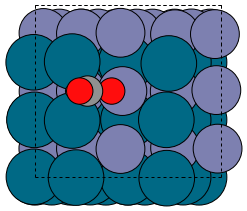




START:


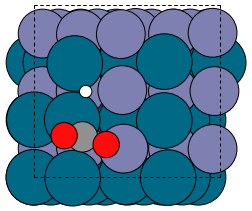

FINAL:


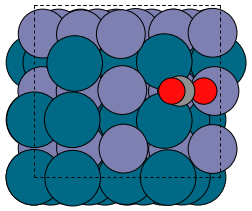




START:


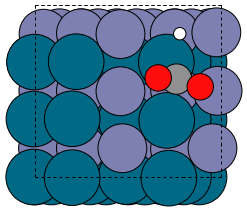

FINAL:


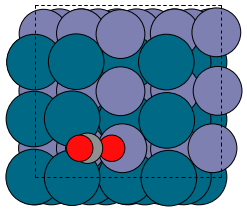




START:


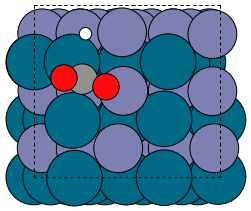

FINAL:


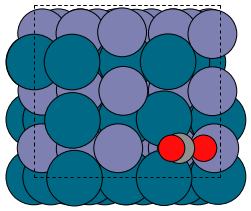




START:


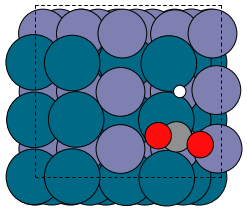

FINAL:


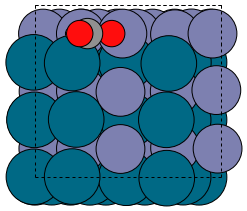




START:


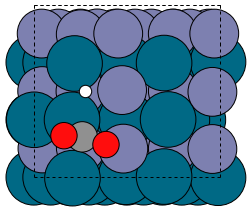

FINAL:


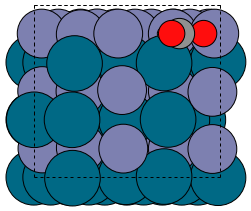




START:


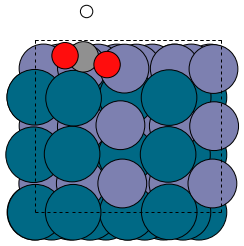

FINAL:


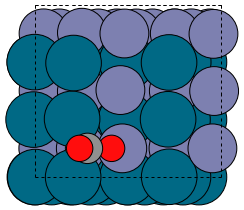




START:


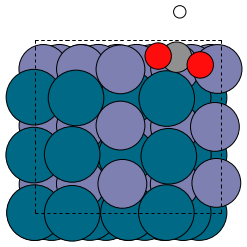

FINAL:


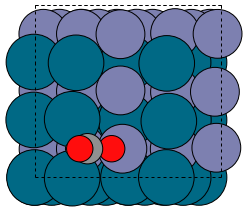




START:


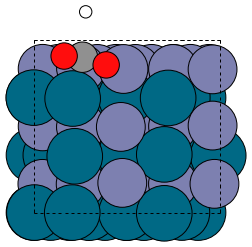

FINAL:


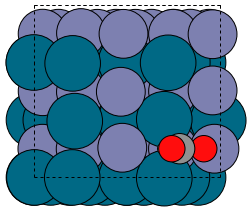

In [64]:
import ipywidgets as widgets

trj = read('NEB/sorted_paths.xyz', index=':')
for i,a in enumerate(trj):
  print ( "\n\n\nSTART:" if i % 2 == 0 else "FINAL:")
  write("tmp.png", a)
  display(Image(filename='tmp.png'))

In [65]:
import ipywidgets as widgets
